In [1]:
import os
import elevation #to download the DEM data
import rasterio as rio
import rioxarray as riox
from rasterio.plot import show
import geopandas as gpd
import folium as fl
# danish data: https://github.com/ok-dk/dagi

/home/cperalta/anaconda3/envs/py310/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_path="data/DK/kvarterPolygon.shp"
df_cph_shp = gpd.read_file(data_path)
df_stations_vejvejr = gpd.read_file("data/vejvejr_stations_ll.shp")
dk_kom = gpd.read_file("data/kommuner.geojson")

In [14]:
df_cph_shp

,v_id,kvarternr,kvarternav,ogc_fid,geometry
0,1.0,20101,Middelalderbyen,1,"POLYGON ((12.58005 55.67215, 12.58011 55.67212..."
1,2.0,20102,Metropolzonen,2,"POLYGON ((12.57140 55.67555, 12.57111 55.67543..."
2,3.0,20103,Nansensgade-Kvarteret,3,"POLYGON ((12.56247 55.68027, 12.56035 55.68109..."
3,4.0,20104,Øster Farimagsgade-kvarteret,4,"POLYGON ((12.57616 55.68629, 12.57377 55.68457..."
4,5.0,20105,Østerport,5,"POLYGON ((12.59907 55.68887, 12.59912 55.68890..."
...,...,...,...,...,...
62,62.0,21206,Kolonihavekvarteret,62,"POLYGON ((12.59221 55.63836, 12.59222 55.63830..."
63,63.0,21207,Sundbyvester,63,"POLYGON ((12.61571 55.64345, 12.61577 55.64332..."
64,64.0,21208,Sundholmsvejs kvarteret,64,"POLYGON ((12.60477 55.65652, 12.60392 55.65522..."
65,65.0,21209,Urbanplanen,65,"POLYGON ((12.59823 55.64865, 12.59823 55.64864..."


In [15]:
df_stations_vejvejr

,Name,geometry
0,100001,POINT (12.48658 55.99569)
1,100100,POINT (11.92110 55.95822)
2,100200,POINT (12.26754 55.90861)
3,100300,POINT (12.19152 55.87290)
4,100400,POINT (12.03982 55.84320)
...,...,...
1036,990700,POINT (10.96589 55.33204)
1037,990800,POINT (10.91901 55.31552)
1038,990900,POINT (10.88443 55.30604)
1039,991000,POINT (10.82876 55.30220)


In [16]:
df_stations_vejvejr[df_stations_vejvejr["Name"] == "344000"]

,Name,geometry
520,344000,POINT (10.34985 54.87617)


In [6]:
dk_aero=dk_kom[dk_kom["KOMNAVN"] == "Ærø"]


In [8]:

    
m = fl.Map(zoom_start=100, layers_control=True, tiles="OpenStreetMap")
# the line above plots the whole world. To use a more precise zoom use https://stackoverflow.com/questions/73405381/folium-get-location-and-zoom-level


for _, r in dk_aero.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = fl.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    fl.Popup(r["KOMNAVN"]).add_to(geo_j)
    geo_j.add_to(m)
for _, r in df_stations_vejvejr.iterrows():
    if df_stations_vejvejr["Name"][_] == "344000":
        sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = fl.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "black"})
        fl.Popup(r["Name"]).add_to(geo_j)
        geo_j.add_to(m)

m    

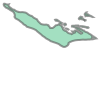

In [29]:
# To download the DEM, let us choose one of the neighbourhood Metropolozonen.

from shapely.ops import unary_union

selected_province = 'Metropolzonen'
gdf_selected_province = df_cph_shp[df_cph_shp['kvarternav']==selected_province]

selected_polygon = unary_union(gdf_selected_province['geometry'].values)
selected_polygon = unary_union(dk_aero["geometry"].values)
selected_polygon

make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
curl -s -o spool/N54/N54E010.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N54/N54E010.hgt.gz && mv spool/N54/N54E010.hgt.gz.temp spool/N54/N54E010.hgt.gz
gunzip spool/N54/N54E010.hgt.gz 2>/dev/null || touch spool/N54/N54E010.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N54/N54E010.hgt cache/N54/N54E010.tif 2>/dev/null || touch cache/N54/N54E010.tif
rm spool/N54/N54E010.hgt
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM1'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
gdalbuildvrt -q -overwrite SRTM1.vrt cache/N39/N39E044.tif cache/N39/N39E045.tif cache/N54/N54E010.tif cache/N40/N40E044.tif cache/N40/N40E045.tif cache/N55/N55E012.tif
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM1'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.5398c7f9033a4ac38e1bc023c415d466.vrt
make: Leav

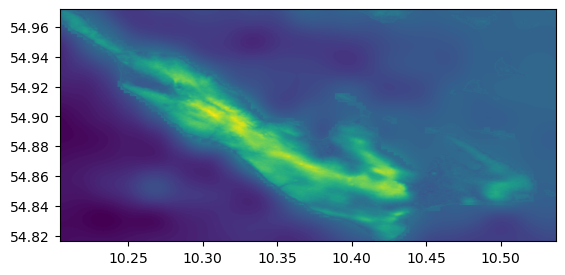

<AxesSubplot:>

In [30]:
output = os.path.join(os.getcwd(),'data/DK/dem_aero.tif')
bounds = selected_polygon.bounds
west_c, south_c, east_c, north_c = bounds
elevation.clip(bounds=bounds, output=output, product='SRTM1')
dem = rio.open(output)
show(dem)


In [31]:
#elevation.clip(bounds=bounds, output=output,product="SRTM3")
#dem = rio.open(output)
#show(dem)


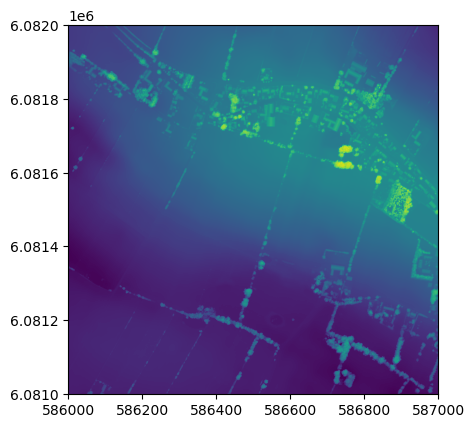

<AxesSubplot:>

In [32]:
#read at the best resolution
dem_dsm_dk = rio.open("data/DSM_1km_6081_586.tif")
show(dem_dsm_dk)